In [1]:
import requests
import pandas as pd
import json
import psycopg2
from sqlalchemy import create_engine 
from dask.diagnostics import ProgressBar
import dask.dataframe as dd
import dask.array as da
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import datetime
from nltk.stem import WordNetLemmatizer
import re
import nltk
from nltk.corpus import stopwords
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.feature_extraction.text import TfidfVectorizer
#stop_words = set(stopwords.words('english'))
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

import tensorflow as tf
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

# Problem Statement

Can you predict the type of the complaint based on the given variables?

# Objective

The goal here is to understand what factors contribute most to Complaint Type and create a model that can predict if a certain it. Need to analysis of Independent Variables and then model the algorithm

# Pipeline

1. Clean Data

2. Exploring the data will follow right after and allow further insight of what our dataset contains. 

3. Understanding the relationship each explanatory variable has with the response variable resides here and we can do this with a correlation matrix.

4. Modeling the data will give us our prediction of categorical variable COMPLAINT TYPE

In [2]:
df = dd.read_csv("C:\\EZOIC_ASSESSMENT\\Queens.csv",error_bad_lines=False)


In [3]:
df.compute()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
0,27842659,2014-04-14 13:27:00,2014-04-14 15:03:00,DEP,Department of Environmental Protection,Sewer,Sewer Backup (Use Comments) (SA),NaN,11428,220-05 93 AVENUE,...,Unspecified,QUEENS,40.722790,-73.735491,"(40.722789705537885, -73.73549132976942)",0.0,0.0,2014,4,0
1,27842663,2014-04-14 12:35:00,2014-04-14 14:28:00,DEP,Department of Environmental Protection,Sewer,Sewer Backup (Use Comments) (SA),NaN,11434,132-41 BENNETT COURT,...,Unspecified,QUEENS,40.678152,-73.762001,"(40.678151620421175, -73.76200138093122)",0.0,0.0,2014,4,0
2,27842672,2014-04-14 01:11:00,2014-04-14 07:00:00,DEP,Department of Environmental Protection,Water System,Hydrant Leaking (WC1),NaN,11370,NaN,...,Unspecified,QUEENS,40.766705,-73.890236,"(40.766704728837894, -73.89023597243937)",0.0,0.0,2014,4,0
3,27842673,2014-04-14 07:43:00,2014-04-14 07:55:00,DEP,Department of Environmental Protection,Water System,Leak (Use Comments) (WA2),NaN,11355,136-13 41 AVENUE,...,Unspecified,QUEENS,40.758676,-73.829084,"(40.75867596109416, -73.82908396074494)",0.0,0.0,2014,4,0
4,27842676,2014-04-14 15:40:00,2014-05-30 10:15:00,DEP,Department of Environmental Protection,Water System,Hydrant Leaking (WC1),NaN,11357,147-15 7 AVENUE,...,Unspecified,QUEENS,40.793684,-73.820933,"(40.793683752861675, -73.82093313934396)",45.0,45.0,2014,4,0
5,27842688,2014-04-14 07:27:00,2014-04-15 10:35:00,DEP,Department of Environmental Protection,Water Conservation,Illegal Use Of A Hydrant (CIN),NaN,11378,NaN,...,Unspecified,QUEENS,40.728631,-73.901227,"(40.72863126576783, -73.9012273296042)",1.0,1.0,2014,4,0
6,27842698,2014-04-11 09:18:32,2014-04-12 12:10:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,11429,217-16 HEMPSTEAD AVENUE,...,Unspecified,QUEENS,40.714743,-73.740739,"(40.714742993099414, -73.74073936929135)",1.0,1.0,2014,4,4
7,27842704,2014-04-14 18:11:51,2014-04-15 07:35:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,11354,NaN,...,Unspecified,QUEENS,40.775977,-73.827779,"(40.77597689723576, -73.82777946503842)",0.0,0.0,2014,4,0
8,27842705,2014-04-14 10:56:41,2014-04-24 07:40:00,DOT,Department of Transportation,Street Condition,Pothole,NaN,11375,JEWEL AVENUE,...,Unspecified,QUEENS,40.723342,-73.845886,"(40.72334172467547, -73.84588554480862)",9.0,9.0,2014,4,0
9,27842711,2014-04-14 09:36:00,2014-04-15 12:00:00,DSNY,BCC - Queens East,Sanitation Condition,12 Dead Animals,Sidewalk,11432,185-19 HILLSIDE AVENUE,...,Unspecified,QUEENS,40.714444,-73.776398,"(40.71444448670634, -73.77639816990789)",1.0,1.0,2014,4,0


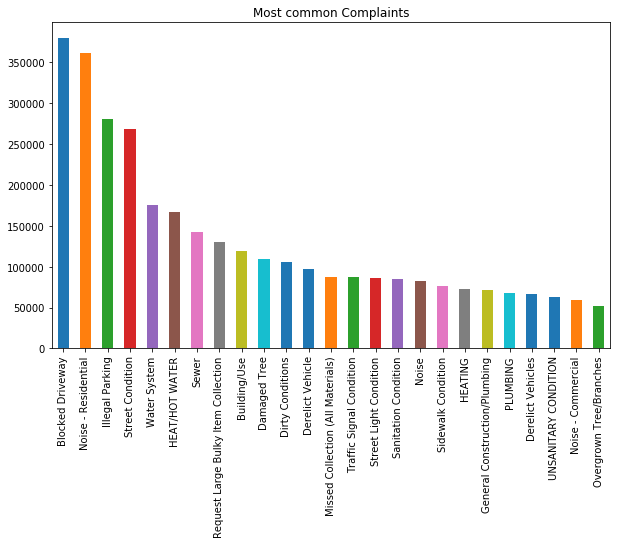

In [4]:
(df['Complaint Type'].value_counts()).head(25).plot(kind='bar',figsize=(10,6), title = 'Most common Complaints')

### Applying Lemmitization for Resolution Description Ex: cats --> cat

In [5]:
pd.set_option('display.max_colwidth', -1)
resdes = df['Resolution Description'].unique()
resdes.unique().compute().to_frame()

,Resolution Description
0,The Department of Environmental Protection has investigated this complaint. Surcharge conditions have been confirmed and attributed to grease. Work was performed to relieve the blockage.
1,The Department of Environmental Protection investigated this complaint and found there was no sewer back up in the city system at the time of the inspection.
2,The Department of Environmental Protection determined that this complaint is a duplicate of a previously filed complaint. The original complaint is being addressed.
3,The Department of Environmental Protection investigated this complaint and shut the running hydrant.
4,The Department of Environmental Protection researched this complaint and determined that it could be closed.
5,The Department of Transportation inspected this complaint and repaired the problem.
6,The Department of Sanitation investigated this complaint and found no condition at the location.
7,The Department of Transportation determined that this complaint is a duplicate of a previously filed complaint. The original complaint is being addressed.
8,The Department of Transportation inspected this complaint and did not find the reported problem.
9,The Department of Transportation inspected this complaint and found that the problem was fixed.


In [6]:
#[k for k, v in locals().items() if isinstance(v, str) and v == df["Resolution Description"]][0]
df["Resolution Description"]= df["Resolution Description"].astype(str) 

#### Remove Digits
#### Remove Punctuation
#### Remove StopWords   Ex:A AN THE IS .....
###### StemPorter does the below     root word "like" include:->"likes"->"liked"->"likely"->"liking"


In [7]:
def remove_digits(x):
    x = ''.join([i for i in x if not i.isdigit()])
    return x

import string
def remove_punctuation(sentence: str) -> str:
    return sentence.translate(str.maketrans('', '', string.punctuation))

import nltk
nltk.download('punkt')

from nltk.corpus import stopwords
nltk.download('stopwords')

stop = stopwords.words('english')

def remove_stop_words(x):
    x = ' '.join([i for i in x.lower().split(' ') if i not in stop])
    return x

def to_lower(x):
    return x.lower()


from nltk.stem.porter import PorterStemmer

porter = PorterStemmer()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pavani.nrusimhdevara\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pavani.nrusimhdevara\AppData\Roaming\nltk_dat
[nltk_data]     a...
[nltk_data]   Package stopwords is already up-to-date!


In [8]:
df['Resolution Description'] = df['Resolution Description'].apply(remove_stop_words)
df['Resolution Description'] = df['Resolution Description'].apply(remove_digits)
df['Resolution Description'] = df['Resolution Description'].apply(remove_punctuation)

df['Resolution Description']= df['Resolution Description'].apply(porter.stem)

C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:3044: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('Resolution Description', 'object'))

  warnings.warn(meta_warning(meta))
C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:3044: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are

In [9]:
pd.set_option('display.max_colwidth', -1)
resdes = df['Resolution Description'].unique()
resdes.unique().compute().to_frame().head()

,Resolution Description
0,department environmental protection investigated complaint surcharge conditions confirmed attributed grease work performed relieve blockag
1,department environmental protection investigated complaint found sewer back city system time inspect
2,department environmental protection determined complaint duplicate previously filed complaint original complaint address
3,department environmental protection investigated complaint shut running hydr
4,department environmental protection researched complaint determined could clos


#### Descriptor

In [10]:
pd.set_option('display.max_colwidth', -1)
resdes = df['Descriptor'].unique()
resdes.unique().compute().to_frame().head()

,Descriptor
0,Sewer Backup (Use Comments) (SA)
1,Hydrant Leaking (WC1)
2,Leak (Use Comments) (WA2)
3,Illegal Use Of A Hydrant (CIN)
4,Pothole


##### Applying ABOVE to Descriptor

In [11]:
df["Descriptor"]= df["Descriptor"].astype(str) 
df['Descriptor'] = df['Descriptor'].apply(remove_stop_words)
df['Descriptor'] = df['Descriptor'].apply(remove_digits)
df['Descriptor'] = df['Descriptor'].apply(remove_punctuation)
porter = PorterStemmer()

df['Descriptor']= df['Descriptor'].apply(porter.stem)

C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:3044: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('Descriptor', 'object'))

  warnings.warn(meta_warning(meta))
C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:3044: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Be

In [12]:
pd.set_option('display.max_colwidth', -1)
resdes = df['Descriptor'].unique()
resdes.unique().compute().to_frame().head()

,Descriptor
0,sewer backup use comments sa
1,hydrant leaking wc
2,leak use comments wa
3,illegal use hydrant cin
4,pothol


In [13]:
pd.set_option('display.max_rows',500)
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
0,27842659,2014-04-14 13:27:00,2014-04-14 15:03:00,DEP,Department of Environmental Protection,Sewer,sewer backup use comments sa,NaN,11428,220-05 93 AVENUE,...,Unspecified,QUEENS,40.722790,-73.735491,"(40.722789705537885, -73.73549132976942)",0.0,0.0,2014,4,0
1,27842663,2014-04-14 12:35:00,2014-04-14 14:28:00,DEP,Department of Environmental Protection,Sewer,sewer backup use comments sa,NaN,11434,132-41 BENNETT COURT,...,Unspecified,QUEENS,40.678152,-73.762001,"(40.678151620421175, -73.76200138093122)",0.0,0.0,2014,4,0
2,27842672,2014-04-14 01:11:00,2014-04-14 07:00:00,DEP,Department of Environmental Protection,Water System,hydrant leaking wc,NaN,11370,NaN,...,Unspecified,QUEENS,40.766705,-73.890236,"(40.766704728837894, -73.89023597243937)",0.0,0.0,2014,4,0
3,27842673,2014-04-14 07:43:00,2014-04-14 07:55:00,DEP,Department of Environmental Protection,Water System,leak use comments wa,NaN,11355,136-13 41 AVENUE,...,Unspecified,QUEENS,40.758676,-73.829084,"(40.75867596109416, -73.82908396074494)",0.0,0.0,2014,4,0
4,27842676,2014-04-14 15:40:00,2014-05-30 10:15:00,DEP,Department of Environmental Protection,Water System,hydrant leaking wc,NaN,11357,147-15 7 AVENUE,...,Unspecified,QUEENS,40.793684,-73.820933,"(40.793683752861675, -73.82093313934396)",45.0,45.0,2014,4,0


##### Checking our Descriptors with Target Variable

In [14]:
df[['Complaint Type','Agency','Descriptor','Resolution Description']].head()

,Complaint Type,Agency,Descriptor,Resolution Description
0,Sewer,DEP,sewer backup use comments sa,department environmental protection investigated complaint surcharge conditions confirmed attributed grease work performed relieve blockag
1,Sewer,DEP,sewer backup use comments sa,department environmental protection investigated complaint found sewer back city system time inspect
2,Water System,DEP,hydrant leaking wc,department environmental protection determined complaint duplicate previously filed complaint original complaint address
3,Water System,DEP,leak use comments wa,department environmental protection determined complaint duplicate previously filed complaint original complaint address
4,Water System,DEP,hydrant leaking wc,department environmental protection investigated complaint shut running hydr


#### I would make use of descriptor/n in my model or atleast while refining my target variable I would use it

In [15]:
df[['Location Type','Location','Latitude','Longitude']].head()

,Location Type,Location,Latitude,Longitude
0,NaN,"(40.722789705537885, -73.73549132976942)",40.722790,-73.735491
1,NaN,"(40.678151620421175, -73.76200138093122)",40.678152,-73.762001
2,NaN,"(40.766704728837894, -73.89023597243937)",40.766705,-73.890236
3,NaN,"(40.75867596109416, -73.82908396074494)",40.758676,-73.829084
4,NaN,"(40.793683752861675, -73.82093313934396)",40.793684,-73.820933


## Check out for plots after conversion to pandas dataframe

##### CHECK MISSING VALUES BY %

In [16]:
missing_values = df.isnull().sum()
missing_count = ((missing_values / df.index.size) * 100)
with ProgressBar():
    missing_count_pct = missing_count.compute()
missing_count_pct


[########################################] | 100% Completed | 12min 21.3s


Unique Key                        0.000000 
Created Date                      0.000000 
Closed Date                       0.000000 
Agency                            0.000000 
Agency Name                       0.000000 
Complaint Type                    0.000000 
Descriptor                        0.000000 
Location Type                     25.107295
Incident Zip                      0.000000 
Incident Address                  18.452511
Street Name                       18.453235
Cross Street 1                    27.247040
Cross Street 2                    27.322873
Address Type                      4.503282 
City                              0.000000 
Status                            0.000000 
Resolution Description            0.000000 
Resolution Action Updated Date    0.000000 
Community Board                   0.000000 
BBL                               20.649465
Borough                           0.000000 
X Coordinate (State Plane)        4.090267 
Y Coordinate (State Plane)      

##### Here are some of the conclusions I can draw
1. None of the Values are above 50% missing so its fine to keep
2.I dont think even the variables like Location Type /Street Name would be of use to the model as we already have "Location"
3. Location,Latitude and Logitude are missing by just 4% (Negligible)
4. Need to analyze address type column and see if it is of use
5. I would use below columns for my model
6. Need to status of complaint over years
7. Target Variable have nans? ------ NO beacuse we already seen the graph above that ahs no major nulls
8. Location = (Latitude,Longitude)
8. Our Target variable is complaint type so status of incident is not a requirement in model for now
"Agency","Descriptor","Location","City","Status","Resolution Description","Latitude","Longitude",,"Total_Time","Resolution_Time","Year","Month ","DayofWeek"  ----> 15 Independent Variables


#### Location Type

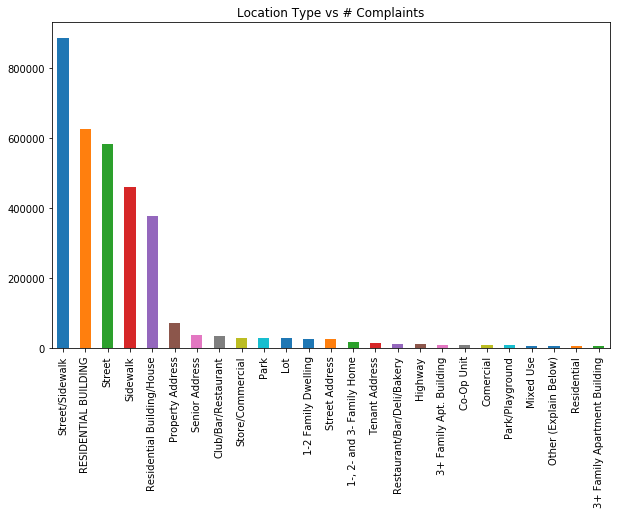

In [17]:
(df['Location Type'].value_counts()).head(25).plot(kind='bar',figsize=(10,6),title = 'Location Type vs # Complaints')

###### LOCATION TYPE: Remove Punctuations and convert them into lowe case 

In [18]:
df['Location Type'] = df['Location Type'].astype(str) 
df['Location Type'] = df['Location Type'].apply(to_lower)
df['Location Type'] = df['Location Type'].apply(remove_punctuation)

C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:3044: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
  Before: .apply(func)
  After:  .apply(func, meta=('Location Type', 'object'))

  warnings.warn(meta_warning(meta))
C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\dask\dataframe\core.py:3044: UserWarning: 
You did not provide metadata, so Dask is running your function on a small dataset to guess output types. It is possible that Dask will guess incorrectly.
To provide an explicit output types or to silence this message, please provide the `meta=` keyword, as described in the map or apply function that you are using.
 

In [19]:
df['Location Type'].head()

0    nan
1    nan
2    nan
3    nan
4    nan
Name: Location Type, dtype: object

In [20]:
location_type = df['Location Type'].value_counts().compute()
location_type = location_type.sort_values(ascending=True)
#Reversing array as maximum number of complaintS should appear first 
location_type[::-1]

nan                                   1144560
streetsidewalk                        886729 
residential building                  627984 
street                                583755 
sidewalk                              462171 
residential buildinghouse             378172 
property address                      71155  
senior address                        39465  
clubbarrestaurant                     36287  
storecommercial                       29902  
park                                  29380  
lot                                   29099  
12 family dwelling                    27573  
street address                        27227  
1 2 and 3 family home                 19325  
tenant address                        14364  
restaurantbardelibakery               13957  
highway                               12160  
3 family apt building                 10853  
coop unit                             10100  
comercial                             9379   
parkplayground                    

In [21]:
df[["Location","Location Type","Latitude","Longitude","Incident Address","Address Type"]].head(10)

,Location,Location Type,Latitude,Longitude,Incident Address,Address Type
0,"(40.722789705537885, -73.73549132976942)",nan,40.722790,-73.735491,220-05 93 AVENUE,ADDRESS
1,"(40.678151620421175, -73.76200138093122)",nan,40.678152,-73.762001,132-41 BENNETT COURT,ADDRESS
2,"(40.766704728837894, -73.89023597243937)",nan,40.766705,-73.890236,NaN,INTERSECTION
3,"(40.75867596109416, -73.82908396074494)",nan,40.758676,-73.829084,136-13 41 AVENUE,ADDRESS
4,"(40.793683752861675, -73.82093313934396)",nan,40.793684,-73.820933,147-15 7 AVENUE,ADDRESS
5,"(40.72863126576783, -73.9012273296042)",nan,40.728631,-73.901227,NaN,INTERSECTION
6,"(40.714742993099414, -73.74073936929135)",nan,40.714743,-73.740739,217-16 HEMPSTEAD AVENUE,ADDRESS
7,"(40.77597689723576, -73.82777946503842)",nan,40.775977,-73.827779,NaN,INTERSECTION
8,"(40.72334172467547, -73.84588554480862)",nan,40.723342,-73.845886,JEWEL AVENUE,BLOCKFACE
9,"(40.71444448670634, -73.77639816990789)",sidewalk,40.714444,-73.776398,185-19 HILLSIDE AVENUE,ADDRESS


1. Locaion Type has >80000 null values which is bit bothering
2. First Can we predict Location Type?
3. If so How to to predict it/Check Acurracy?   --> Agency , Latitude, Longitude, Incizent Zip lets try ...
4. Incident Address Cannot identify the type of location at all

In [22]:
df["Address Type"].unique()

Dask Series Structure:
npartitions=1
    object
    ...   
Name: Address Type, dtype: object
Dask Name: unique-agg, 1722 tasks

#############################################################################################################
############################################################################################################
###############################################################################################################
##################################################################################################################
####################################################################################################################

## Converting DASK to Pandas Dataframe

In [23]:
df = df.compute()

In [24]:
df.tail()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
32837,27842606,2014-04-14 14:46:00,2014-04-18 14:35:00,DEP,Department of Environmental Protection,Sewer,catch basin cloggedflooding use comments sc,nan,11379,NaN,...,Unspecified,QUEENS,40.715623,-73.877186,"(40.71562266893539, -73.87718591475993)",3.0,3.0,2014,4,0
32838,27842627,2014-04-14 14:01:00,2014-04-14 18:10:00,DEP,Department of Environmental Protection,Water System,hyd valve box cover missing wv,nan,11370,22-20 76 STREET,...,Unspecified,QUEENS,40.768025,-73.893328,"(40.76802510935089, -73.89332768490652)",0.0,0.0,2014,4,0
32839,27842630,2014-04-14 10:14:00,2014-04-17 11:30:00,DEP,Department of Environmental Protection,Industrial Waste,grease sewercatch basin idg,nan,11412,NaN,...,Unspecified,QUEENS,40.701428,-73.765081,"(40.70142819238326, -73.76508122118476)",3.0,3.0,2014,4,0
32840,27842633,2014-04-14 16:11:00,2014-04-21 22:30:00,DEP,Department of Environmental Protection,Noise,noise alarms nr,nan,11435,145-20 FERNDALE AVENUE,...,Unspecified,QUEENS,40.688881,-73.800982,"(40.688880880982644, -73.80098211589359)",7.0,7.0,2014,4,0
32841,27842636,2014-04-14 15:58:32,2014-04-14 16:17:39,NYPD,New York City Police Department,Derelict Vehicle,license pl,streetsidewalk,11419,101-35 118 STREET,...,Unspecified,QUEENS,40.689370,-73.826676,"(40.689369846809996, -73.82667619447729)",0.0,0.0,2014,4,0


##### Removing NULL values of Location Latitude and Longitude from my dataset as they constitude 4% of missing values

In [25]:
df= df[df['Longitude'].notnull()]
df= df[df['Latitude'].notnull()]
df= df[df['Location'].notnull()]

###### Analysisng our Target Variable with IVs

(-78.41312690115696, -73.47167317190589, 39.48450374803224, 40.868515525871736)

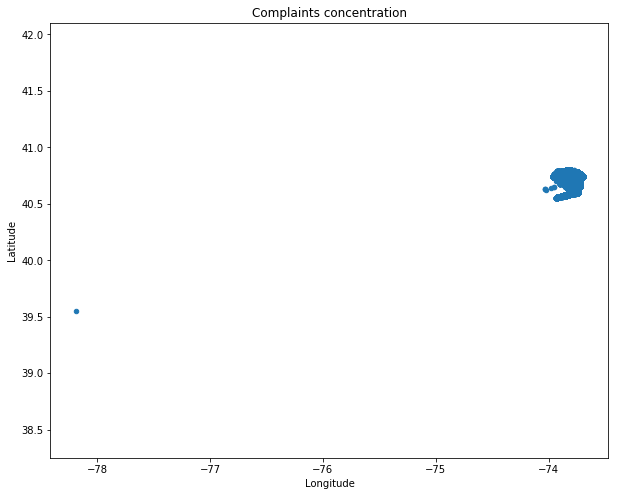

In [26]:
df.plot(kind='scatter',x='Longitude', y='Latitude', figsize=(10,8),title = 'Complaints concentration').axis('equal')

(-78.18450808221115, -73.70029199085172, 39.5525551788817, 40.800464095022285)

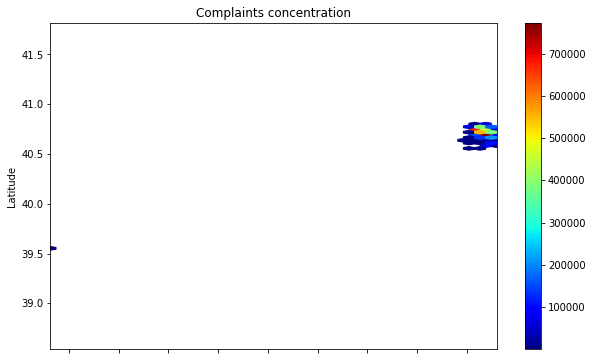

In [27]:
df.plot(kind='hexbin', x='Longitude', y='Latitude', gridsize=40,colormap = 'jet',mincnt=1,title = 'Complaints concentration', figsize=(10,6)).axis('equal')

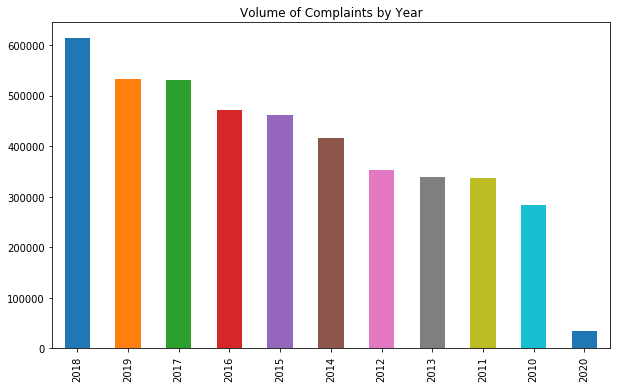

In [28]:
##### Complaints by Year 

df['Year'].value_counts().plot(kind = 'bar',figsize=(10,6), title = 'Volume of Complaints by Year')

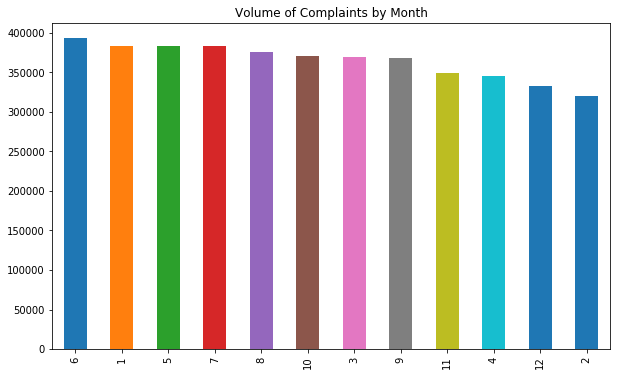

In [29]:
df['Month'].value_counts().plot(kind = 'bar',figsize=(10,6), title = 'Volume of Complaints by Month')

#### January,October-Novemeber and May are of most complaints

#############################################################################################################
#############################################################################################################

### Complaint Type : Target Variable Analysis and MeRGINGS

In [30]:
df['Complaint Type'] = df['Complaint Type'].apply(remove_punctuation)

df['Complaint Type'] = df['Complaint Type'].apply(to_lower)

In [31]:
df['Complaint Type'].value_counts()

blocked driveway                         379701
noise  residential                       361145
illegal parking                          279923
street condition                         265874
water system                             174649
heathot water                            166901
sewer                                    142155
request large bulky item collection      129673
buildinguse                              119422
damaged tree                             108634
dirty conditions                         106216
derelict vehicle                         97009 
missed collection all materials          87082 
traffic signal condition                 86805 
street light condition                   85690 
sanitation condition                     85089 
noise                                    81811 
plumbing                                 81242 
sidewalk condition                       76111 
heating                                  72185 
general constructionplumbing            

In [32]:
df[['Complaint Type','Descriptor']]

,Complaint Type,Descriptor
0,sewer,sewer backup use comments sa
1,sewer,sewer backup use comments sa
2,water system,hydrant leaking wc
3,water system,leak use comments wa
4,water system,hydrant leaking wc
5,water conservation,illegal use hydrant cin
6,street condition,pothol
7,street condition,pothol
8,street condition,pothol
9,sanitation condition,dead anim


###### Heat Complaints

In [33]:
df[df['Complaint Type'].str.contains("cool") ][['Complaint Type',"Descriptor"]]

,Complaint Type,Descriptor
117217,cooling tower,unsanitary condit
35754,cooling tower,unsanitary condit
55559,cooling tower,unsanitary condit
100979,cooling tower,unsanitary condit
101177,cooling tower,unsanitary condit
27847,cooling tower,brokendefect
62881,cooling tower,unsanitary condit
80911,cooling tower,unsanitary condit
98644,cooling tower,unsanitary condit
114756,cooling tower,unsanitary condit


In [34]:
df[df['Complaint Type'].str.contains("heat") ]["Complaint Type"].unique()

array(['heathot water', 'nonresidential heat', 'heating'], dtype=object)

In [35]:
df['Complaint Type'] = df['Complaint Type'].replace(['heathot water', 'nonresidential heat','heating'], 'HeatComplaints')

##### Noise Complaints

In [36]:
df[df['Complaint Type'].str.contains("noise") ]["Complaint Type"].unique()

array(['noise', 'noise  residential', 'noise  streetsidewalk',
       'collection truck noise', 'noise  vehicle', 'noise  commercial',
       'noise  house of worship', 'noise  park', 'noise  helicopter',
       'noise survey'], dtype=object)

##### Whats a Noise Survey Means?

In [37]:
df[df['Complaint Type'].str.contains("noise survey") ][['Complaint Type',"Descriptor","Resolution Description","Agency"]].head()

,Complaint Type,Descriptor,Resolution Description,Agency
35397,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1
35405,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1
35413,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1
35415,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1
35416,noise survey,people created nois,thank report city use information provided tracking reporting purposes status inform,3-1-1


###### Its noise created by people and they 3-1-1 to complain. 311 is non emergency phone number

In [38]:
df['Complaint Type'] = df['Complaint Type'].replace(['noise', 'collection truck noise', 'noise  commercial',
       'noise  residential', 'noise  vehicle', 'noise  house of worship',
       'noise  streetsidewalk', 'noise  park', 'noise  helicopter',
       'noise survey'], 'NoiseComplaints')

##### Construction/Plumbing Complaints

In [39]:
df[df['Complaint Type'].str.contains("construction|plumbing") ]["Complaint Type"].unique()

array(['general constructionplumbing', 'plumbing', 'construction',
       'construction safety enforcement', 'general construction'],
      dtype=object)

In [40]:
df['Complaint Type'] = df['Complaint Type'].replace(['general constructionplumbing', 'construction safety enforcement',
       'construction lead dust', 'general construction', 'construction','plumbing'],'Construction/PlumbingComplaints')

###### Parking Complaints

In [41]:
df[df['Complaint Type'].str.contains("parking|blocked driveway|park") ]["Complaint Type"].unique()

array(['illegal parking', 'blocked driveway', 'violation of park rules',
       'municipal parking facility', 'animal in a park',
       'broken parking meter', 'trafficillegal parking',
       'dof parking  payment issue'], dtype=object)

In [42]:
df[df['Complaint Type'].str.contains("dof parking  payment issue") ][['Complaint Type',"Descriptor","Resolution Description","Agency"]].head()

,Complaint Type,Descriptor,Resolution Description,Agency
58462,dof parking payment issue,copy stat,department finance mailed requested item,DOF
58463,dof parking payment issue,person reflected mailed reflect,see not,DOF


##### Note dof parking payment: comes under dof issues because you will know what type of complaint in descriptor

In [43]:
# Note dof parking payment comes under dof issues because you will know what type of complaint in descriptor

df['Complaint Type'] = df['Complaint Type'].replace(['illegal parking', 'municipal parking facility',
       'broken parking meter', 'trafficillegal parking','violation of park rules','blocked driveway'],'ParkingComplaints')

##### DOF issues (Department of Fiance)

In [44]:
df[df['Complaint Type'].str.contains("dof") ]["Complaint Type"].unique()

array(['dof property  payment issue', 'dof parking  payment issue',
       'dof property  reduction issue', 'dof literature request'],
      dtype=object)

In [45]:
df['Complaint Type'] = df['Complaint Type'].replace(['dof property  payment issue', 'dof property  owner issue',
       'dof property  request copy', 'dof property  reduction issue',
       'dof property  city rebate', 'dof parking  payment issue',
       'dof property  property value', 'dof property  rpie issue',
       'dof property  state rebate', 'dof parking  tax exemption',
       'dof property  update account'],'DOFComplaints')

###### Paint Plaster Issues

In [46]:
df[df['Complaint Type'].str.contains("paint") ]["Complaint Type"].unique()

array(['paintplaster', 'paint  plaster'], dtype=object)

In [47]:
df['Complaint Type'] = df['Complaint Type'].replace(['paintplaster', 'paint  plaster'],'Paint/PlasterComplaints')

##### Water Complaints

In [48]:
df[df['Complaint Type'].str.contains("water") ]["Complaint Type"].unique()

array(['water system', 'water conservation', 'water leak',
       'standing water', 'water quality', 'bottled water',
       'drinking water'], dtype=object)

In [49]:
df['Complaint Type'] = df['Complaint Type'].replace(['water system', 'water leak', 'standing water',
       'water conservation', 'water quality', 'drinking water',
       'bottled water'],'WaterComplaints')

##### SanitaryCompalints

In [50]:
df[df['Complaint Type'].str.contains("dirt|sanitation condition") ]["Complaint Type"].unique()

array(['sanitation condition', 'dirty conditions'], dtype=object)

In [51]:
df['Complaint Type'] = df['Complaint Type'].replace(['unsanitary pigeon condition',
    'unsanitary condition','dirty conditions','unsanitary animal pvt property','sanitation condition'],'SanitationComplaints')

###### Highway Complaints

In [52]:
df[df['Complaint Type'].str.contains("highway") ]["Complaint Type"].unique()

array(['highway condition', 'highway sign  damaged',
       'highway sign  dangling', 'highway sign  missing'], dtype=object)

In [53]:
df['Complaint Type'] = df['Complaint Type'].replace(['highway condition', 'highway sign  missing',
       'highway sign  dangling', 'highway sign  damaged'],'HighwayComplaints')

###### Street/Vehicle/TreeCompalints

In [54]:
df[df['Complaint Type'].str.contains("tree|sidewalk|vehicle") ]["Complaint Type"].unique()

array(['street condition', 'derelict vehicles', 'street light condition',
       'derelict vehicle', 'sidewalk condition',
       'for hire vehicle complaint', 'dead tree', 'damaged tree',
       'rootsewersidewalk condition', 'street sign  missing',
       'street sign  damaged', 'new tree request',
       'overgrown treebranches', 'street sign  dangling',
       'illegal tree damage', 'for hire vehicle report', 'deaddying tree',
       'request xmas tree collection', 'abandoned vehicle',
       'dep street condition', 'homeless street condition',
       'city vehicle placard complaint'], dtype=object)

###### Checking ("request xmas tree collection","homeless street condition")

In [55]:
pd.set_option('display.max_colwidth', -1)
df[df['Complaint Type'].str.contains("request xmas tree collection","homeless street condition") ][["Descriptor","Resolution Description"]].head()
####during christmas people order xmas trees and keep it on side walk issues

,Descriptor,Resolution Description
62852,c request xmas trees collect,department sanitation removed item
62933,c request xmas trees collect,department sanitation investigated found complaint jurisdiction department sanitation reviewed found meeting criteria compliant service request
62974,c request xmas trees collect,department sanitation cleaned loc
63008,c request xmas trees collect,department sanitation removed item
63223,c request xmas trees collect,department sanitation removed item


In [56]:
pd.set_option('display.max_colwidth', -1)
df[df['Complaint Type'].str.contains("homeless street condition") ][["Descriptor","Resolution Description"]].head()
####during christmas people order xmas trees and keep it on side walk issues

,Descriptor,Resolution Description
16753,nan,police department reviewed complaint provided additional information below
17163,nan,police department responded complaint took action fix condit
22074,nan,police department responded complaint determined police action necessari
22361,nan,police department responded complaint information available observed evid
24538,nan,complaint fall police departments jurisdict


In [57]:
#graffiti
pd.set_option('display.max_colwidth', 1)

df[df['Complaint Type'].str.contains("graffiti") ][["Descriptor","Resolution Description"]].head()

,Descriptor,Resolution Description
210,graffiti,city removed graffiti properti
216,graffiti,city removed graffiti properti
357,graffiti,city removed graffiti properti
712,graffiti,city removed graffiti properti
988,graffiti,city removed graffiti properti


##### I am removing homeless street condition as it comes under HomelessComplaints

In [58]:
df['Complaint Type'] = df['Complaint Type'].replace(['street light condition', 'street condition',
       'street sign  damaged', 'sidewalk condition', 'dead tree',
       'street sign  dangling', 'street sign  missing', 'damaged tree',
       'new tree request', 'illegal tree damage',
       'rootsewersidewalk condition', 'overgrown treebranches',
       'request xmas tree collection', 'deaddying tree',
       'dep sidewalk condition','graffiti','derelict vehicles',
       'for hire vehicle complaint', 'derelict vehicle',
       'for hire vehicle report', 'abandoned vehicle',
       'city vehicle placard complaint'],'StreetComplaints')

##### Sewer Complaints,Traffic,Homeless

In [59]:
df[df['Complaint Type'].str.contains("sewer|sewage") ]["Complaint Type"].unique()


array(['sewer', 'indoor sewage'], dtype=object)

In [60]:
df['Complaint Type'] = df['Complaint Type'].replace(['sewer','indoor sewage'],'SewerComplaints')

##### Homeless Complaints

In [61]:
df[df['Complaint Type'].str.contains("homeless") ]["Complaint Type"].unique()

array(['homeless encampment', 'homeless person assistance',
       'homeless street condition'], dtype=object)

In [62]:
df['Complaint Type'] = df['Complaint Type'].replace(['homeless street condition',
                                                     'homeless encampment', 'homeless person assistance'],'HomelessComplaints')

In [63]:
df[df['Complaint Type'].str.contains("traffic|signal") ]["Complaint Type"].unique()

array(['traffic signal condition', 'traffic'], dtype=object)

In [64]:
df['Complaint Type'] = df['Complaint Type'].replace(['traffic signal condition', 'traffic'],'TrafficComplaints')

##### Taxi Complaints

In [65]:
df[df['Complaint Type'].str.contains("taxi") ]["Complaint Type"].unique()

array(['taxi complaint', 'taxi report', 'dispatched taxi complaint',
       'green taxi report', 'taxi compliment', 'taxi licensee complaint'],
      dtype=object)

In [66]:
df['Complaint Type'] = df['Complaint Type'].replace(['taxi complaint', 'taxi report', 'taxi compliment',
       'green taxi report', 'dispatched taxi complaint'],'TaxiComplaints')

###### Building Complaints

In [67]:
df[df['Complaint Type'].str.contains("building|floor|window|apt|apartment") ]["Complaint Type"].unique()

array(['buildinguse', 'flooringstairs', 'doorwindow', 'outside building',
       'building marshals office', 'building condition'], dtype=object)

###### Checking the Building Complaints in detail

In [68]:
df[df['Complaint Type'].str.contains("building|floor|window|apt|apartment") ][["Complaint Type","Descriptor","Resolution Description"]]

,Complaint Type,Descriptor,Resolution Description
33,buildinguse,illegal commercial use resident zon,department buildings accepted complaint refer padlock unit investigation enforcement act
37,flooringstairs,floor,department housing preservation development inspected following conditions violations issued complaint clos
42,buildinguse,illegal conversion residential buildingspac,department buildings investigated complaint determined action necessari
44,buildinguse,illegal conversion residential buildingspac,department buildings attempted investigate complaint twice could gain access location problem still exists please call file new complaint additional access information outside new york city please call newyork
45,buildinguse,illegal conversion residential buildingspac,department buildings attempted investigate complaint twice could gain access location problem still exists please call file new complaint additional access information outside new york city please call newyork
46,buildinguse,illegal conversion residential buildingspac,department buildings attempted investigate complaint twice could gain access location problem still exists please call file new complaint additional access information outside new york city please call newyork
111,buildinguse,illegal conversion residential buildingspac,nan
113,buildinguse,illegal conversion residential buildingspac,department buildings attempted investigate complaint twice could gain access location problem still exists please call file new complaint additional access information outside new york city please call newyork
114,buildinguse,illegal conversion residential buildingspac,department buildings attempted investigate complaint twice could gain access location problem still exists please call file new complaint additional access information outside new york city please call newyork
115,buildinguse,illegal commercial use resident zon,department buildings attempted investigate complaint twice could gain access location problem still exists please call file new complaint additional access information outside new york city please call newyork


In [69]:
df['Complaint Type'] = df['Complaint Type'].replace(['doorwindow', 'flooringstairs', 'buildinguse', 'outside building',
       'vacant apartment', 'building marshals office',
       'building condition','elevator'],'BuildingComplaints')

##### Rodent

In [70]:
df[df['Complaint Type'].str.contains("rodent|cockroach|pest") ][["Descriptor","Resolution Description"]].head()

,Descriptor,Resolution Description
233,rat sight,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
309,mouse sight,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
367,signs rod,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
374,condition attracting rod,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu
594,rat sight,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu


In [71]:
df[df['Complaint Type'].str.contains("broken muni meter") ][["Descriptor","Resolution Description"]].head()

,Descriptor,Resolution Description
12563,receipt,department transportation inspected condition reported find additional information notes customer field
23303,receipt,department transportation inspected condition reported find additional information notes customer field
23472,coin card regist,department transportation inspected condition reported find additional information notes customer field
30884,receipt,general maintenance cleaning regular schedule next scheduled maintenance cleaning correct condit
33517,coin card regist,department transportation inspected condition reported find additional information notes customer field


In [72]:
df[df['Complaint Type'].str.contains("request large bulky item collection") ][["Descriptor","Resolution Description"]].head()

,Descriptor,Resolution Description
104303,request large bulky item collect,nan
104326,request large bulky item collect,nan
104337,request large bulky item collect,nan
104361,request large bulky item collect,nan
104410,request large bulky item collect,nan


In [73]:
df['Complaint Type'].value_counts()

StreetComplaints                         941386
ParkingComplaints                        676899
NoiseComplaints                          604892
SanitationComplaints                     261177
HeatComplaints                           239114
Construction/PlumbingComplaints          220697
WaterComplaints                          218191
BuildingComplaints                       172033
SewerComplaints                          143956
request large bulky item collection      129673
TrafficComplaints                        94872 
missed collection all materials          87082 
Paint/PlasterComplaints                  62480 
rodent                                   43690 
consumer complaint                       41393 
electric                                 36661 
broken muni meter                        31654 
TaxiComplaints                           23446 
nonemergency police matter               23241 
snow                                     23104 
nonconst                                

In [74]:
df.loc[~df["Complaint Type"].isin(['NoiseComplaints',
'HeatComplaints',                           
'StreetComplaints',                         
'Construction/PlumbingComplaints',                    
'SanitationComplaints',                     
'WaterComplaints',                         
'BuildingComplaints',                       
'Paint/PlasterComplaints',                   
'TaxiComplaints',                           
'HomelessComplaints',
'DOFComplaints',
'HighwayComplaints',
'ParkingComplaints',
'broken muni meter',                        
'rodent',                                   
'consumer complaint',                      
'electric',                                  
'general',                                 
'SewerComplaints',                          
'request large bulky item collection',      
'air quality',                                
'nonconst',                                 
'TrafficComplaints',                         
'vending',                                   
'food establishment',                       
'missed collection all materials' ]), "Complaint Type"] = "Other Complaints"

In [75]:
df['Complaint Type'].value_counts()

StreetComplaints                       941386
ParkingComplaints                      676899
NoiseComplaints                        604892
SanitationComplaints                   261177
Other Complaints                       245411
HeatComplaints                         239114
Construction/PlumbingComplaints        220697
WaterComplaints                        218191
BuildingComplaints                     172033
SewerComplaints                        143956
request large bulky item collection    129673
TrafficComplaints                      94872 
missed collection all materials        87082 
Paint/PlasterComplaints                62480 
rodent                                 43690 
consumer complaint                     41393 
electric                               36661 
broken muni meter                      31654 
TaxiComplaints                         23446 
nonconst                               23068 
general                                17989 
air quality                       

In [76]:
df[df['Complaint Type'].str.contains("vending|food establishment") ][["Complaint Type","Descriptor","Resolution Description"]].head()

,Complaint Type,Descriptor,Resolution Description
41340,vending,unlicens,police department responded complaint took action fix condit
43768,vending,prohibited area,police department responded complaint took action fix condit
49382,food establishment,plumb,department health mental hygiene sent official written notification ownerlandlord warning potential violations instructing correct situation situation persists days initial complaint please make new complaint
50964,vending,unlicens,police department responded complaint information available observed evidence violation tim
61302,vending,unlicens,police department responded complaint took action fix condit


In [77]:
df['Complaint Type'] = df['Complaint Type'].replace(['vending'],'StreetComplaints')

##### Vending Complaints comes uder Street Complaints

In [78]:
df['Complaint Type'].value_counts()

StreetComplaints                       947344
ParkingComplaints                      676899
NoiseComplaints                        604892
SanitationComplaints                   261177
Other Complaints                       245411
HeatComplaints                         239114
Construction/PlumbingComplaints        220697
WaterComplaints                        218191
BuildingComplaints                     172033
SewerComplaints                        143956
request large bulky item collection    129673
TrafficComplaints                      94872 
missed collection all materials        87082 
Paint/PlasterComplaints                62480 
rodent                                 43690 
consumer complaint                     41393 
electric                               36661 
broken muni meter                      31654 
TaxiComplaints                         23446 
nonconst                               23068 
general                                17989 
air quality                       

##### Revisiting Location Type (Only doing it for highest amount of variables)

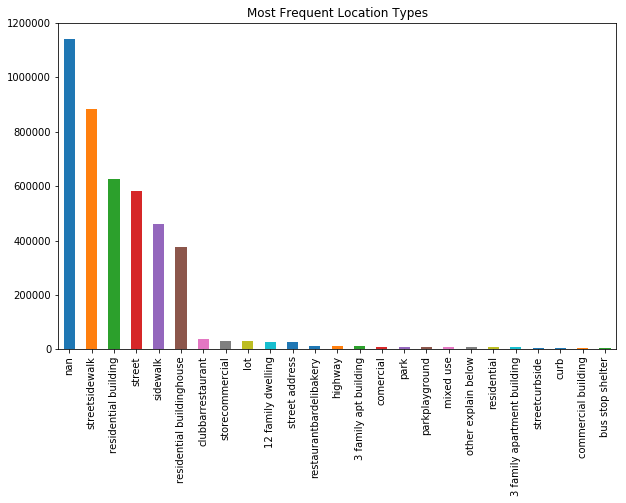

In [79]:
(df['Location Type'].value_counts()).head(25).plot(kind='bar',
                    figsize=(10,6), title = 'Most Frequent Location Types')

In [80]:
df['Location Type'].unique()

array(['nan', 'sidewalk', 'street', '12 family dwelling',
       'residential building', 'lot', 'senior center', 'streetsidewalk',
       'storecommercial', 'comercial', 'mixed use', 'other explain below',
       '3 family mixed use building', 'residential',
       '3 family apt building', 'other', 'vacant lot',
       '3 family apartment building', 'commercial building',
       '12 family mixed use building', 'residential buildinghouse',
       'vacant building', 'park', 'street address', 'garage',
       'construction site', 'school', 'highway', 'bus stop shelter',
       'abandoned building', 'catch basinsewer', 'spa pool',
       'single room occupancy sro', 'clubbarrestaurant', 'curb',
       'government building', 'tire shop', 'public gardenpark',
       'parking lotgarage', 'recreation center', 'office building',
       'schoolpreschool', 'pool', 'public garden',
       'restaurantbardelibakery', 'bike lane', 'parkplayground', 'taxi',
       'house of worship', 'day carenursery'

In [81]:
df[df['Location Type'].str.contains("residential") ]["Location Type"].unique()

array(['residential building', 'residential', 'residential buildinghouse',
       'residential property', 'building nonresidential'], dtype=object)

In [82]:
df['Location Type'] = df['Location Type'].replace(['residential building', 'residential', 'residential buildinghouse',
       'residential property'],'RESIDENTIAL')

In [83]:
df[df['Location Type'].str.contains("school") ]["Location Type"].unique()

array(['school', 'schoolpreschool', 'cafeteria  private school',
       'cafeteria  public school', 'school safety zone', 'private school'],
      dtype=object)

In [84]:
df['Location Type'] = df['Location Type'].replace(['schoolpreschool', 'school', 'cafeteria  private school',
       'cafeteria  public school', 'private school', 'public school',
       'school safety zone'],'SCHOOL')

In [85]:
df[df['Location Type'].str.contains("apartment") ]["Location Type"].unique()

array(['3 family apartment building', 'apartment', 'apartment building'],
      dtype=object)

In [86]:
df['Location Type'] = df['Location Type'].replace(['3 family apartment building', 'apartment', 'apartment building'],'SCHOOL')

In [87]:
df[df['Location Type'].str.contains("comercial|commercial") ]["Location Type"].unique()

array(['storecommercial', 'comercial', 'commercial building',
       'commercial', 'commercial property'], dtype=object)

In [88]:
df['Location Type'] = df['Location Type'].replace(['comercial', 'commercial building', 'storecommercial',
       'commercial', 'commercial property'],'COMMERCIAL')

In [89]:
df[df['Location Type'].str.contains("play|park") ]["Location Type"].unique()

array(['park', 'public gardenpark', 'parking lotgarage', 'parkplayground',
       'parking lot', 'public parkgarden'], dtype=object)

##### Remove parking lotgrarage

In [90]:
df['Location Type'] = df['Location Type'].replace(['public gardenpark', 'park', 'parkplayground', 'public parkgarden'],'PARK')

In [91]:
df[df['Location Type'].str.contains("restaurant") ]["Location Type"].unique()

array(['clubbarrestaurant', 'restaurantbardelibakery', 'restaurant',
       'barrestaurant'], dtype=object)

In [92]:
df['Location Type'] = df['Location Type'].replace(['clubbarrestaurant', 'restaurantbardelibakery', 'restaurant',
       'barrestaurant'],'RESTAURANT')

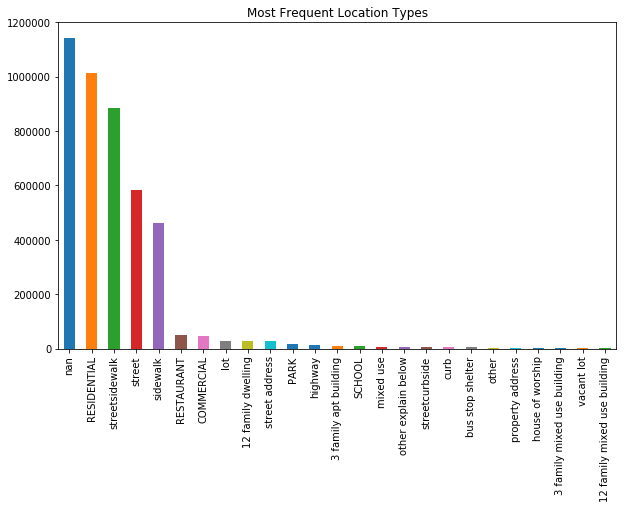

In [93]:
(df['Location Type'].value_counts()).head(25).plot(kind='bar',
                    figsize=(10,6), title = 'Most Frequent Location Types')

## Status Variable

In [94]:
df['Status'].unique()

array(['Closed', 'Pending', 'Started', 'Open', 'Assigned', 'In Progress',
       'Unassigned'], dtype=object)

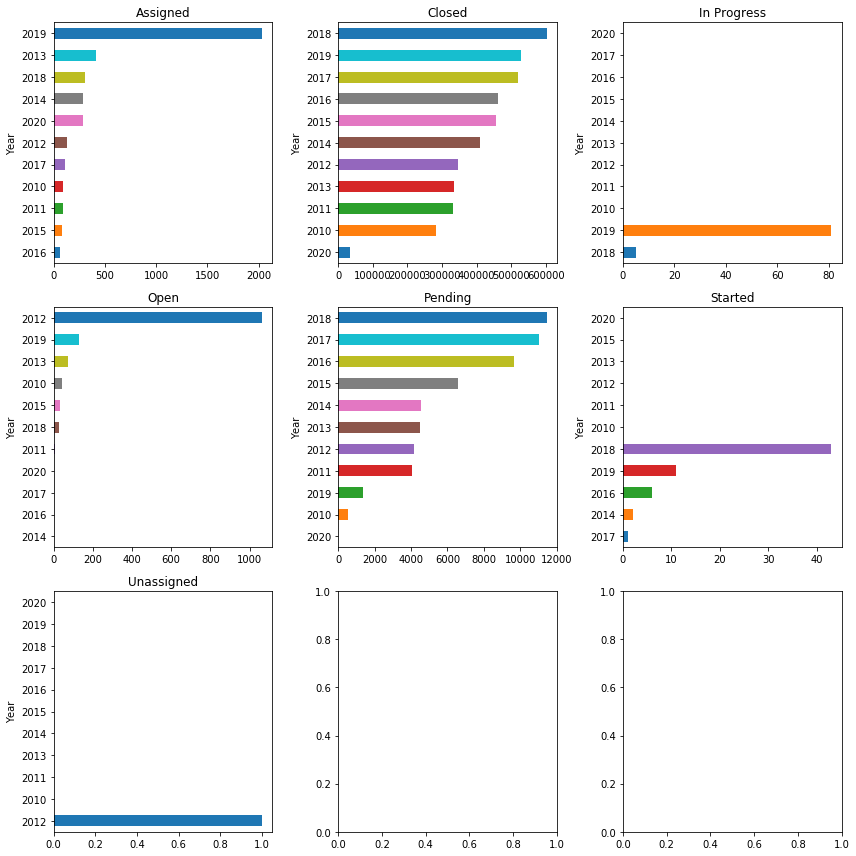

In [95]:
borough_comp = df.groupby(['Year','Status']).size().unstack()

col_number = 3
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

In [96]:
df[df['Status']!='Closed'][["Complaint Type","Status","Descriptor","Year","Resolution Description"]]

,Complaint Type,Status,Descriptor,Year,Resolution Description
22,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
72,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
76,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
156,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
245,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
249,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
346,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
352,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
431,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item
510,StreetComplaints,Pending,derelict vehicl,2014,department sanitation removed item


#### Derelict Vehicle means Abondend Vehicle they cant stay for years on streets some one will report or authorities with take a look so the incidents below certain year can be removed as they forgot to close the request
It can be observed that

1. There are many direlict vehicle complaints reported few years ago and "Department of Sanitation has removed vehicles" but the incidents were not closed

##### I have to remove above rows as they are outliers and are supposed to be closed

In [97]:
df[(df['Status']!='Closed' ) & (df['Descriptor'].str.contains("derelict vehicl") ) & (df['Resolution Description'].str.contains("removed") )]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek
22,27842762,2014-04-14 19:06:00,2014-04-14 19:06:00,DSNY,BCC - Queens West,StreetComplaints,derelict vehicl,street,11385,1718 NORMAN STREET,...,Unspecified,QUEENS,40.697486,-73.900898,"(40.697486153061526, -73.90089841441812)",0.0,0.0,2014,4,0
72,27843612,2014-04-14 15:35:00,2014-04-14 15:35:00,DSNY,Queens West 02,StreetComplaints,derelict vehicl,street,11377,37-40 64 STREET,...,Unspecified,QUEENS,40.748326,-73.898993,"(40.74832568199573, -73.89899298761695)",0.0,0.0,2014,4,0
76,27843627,2014-04-14 07:05:00,2014-04-14 12:00:00,DSNY,Queens East 12,StreetComplaints,derelict vehicl,street,11435,NaN,...,Unspecified,QUEENS,40.698444,-73.802555,"(40.698443643180276, -73.80255480098698)",0.0,0.0,2014,4,0
156,27844540,2014-04-14 11:19:00,2014-04-14 12:00:00,DSNY,Queens East 12,StreetComplaints,derelict vehicl,street,11413,137-22 SOUTHGATE STREET,...,Unspecified,QUEENS,40.674414,-73.759826,"(40.67441419372573, -73.75982643342772)",0.0,0.0,2014,4,0
245,27845442,2014-04-14 09:42:00,2014-04-14 12:00:00,DSNY,BCC - Queens West,StreetComplaints,derelict vehicl,street,11421,ATLANTIC AVENUE,...,Unspecified,QUEENS,40.683818,-73.864073,"(40.68381801106335, -73.86407330396878)",0.0,0.0,2014,4,0
249,27845472,2014-04-14 09:44:00,2014-04-14 12:00:00,DSNY,BCC - Queens West,StreetComplaints,derelict vehicl,street,11421,ATLANTIC AVENUE,...,Unspecified,QUEENS,40.683818,-73.864073,"(40.68381801106335, -73.86407330396878)",0.0,0.0,2014,4,0
346,27846381,2014-04-14 20:55:00,2014-04-14 20:55:00,DSNY,BCC - Queens East,StreetComplaints,derelict vehicl,street,11356,129 STREET,...,Unspecified,QUEENS,40.785161,-73.839391,"(40.78516109715741, -73.83939058094072)",0.0,0.0,2014,4,0
352,27846396,2014-04-14 13:57:00,2014-04-14 13:57:00,DSNY,BCC - Queens East,StreetComplaints,derelict vehicl,street,11692,319 BEACH 74 STREET,...,Unspecified,QUEENS,40.591243,-73.802306,"(40.591242656703486, -73.8023064799498)",0.0,0.0,2014,4,0
431,27847381,2014-04-14 15:36:00,2014-04-14 15:36:00,DSNY,BCC - Queens East,StreetComplaints,derelict vehicl,street,11692,62-14 BURCHELL ROAD,...,Unspecified,QUEENS,40.596575,-73.792273,"(40.59657458498144, -73.79227305799965)",0.0,0.0,2014,4,0
510,27848259,2014-04-14 10:53:00,2014-04-14 12:00:00,DSNY,Queens West 04,StreetComplaints,derelict vehicl,street,11368,108-21 46 AVENUE,...,Unspecified,QUEENS,40.747405,-73.856552,"(40.7474050691403, -73.85655228688958)",0.0,0.0,2014,4,0


##### I am changing the status of those incidents that has to be closed 

In [98]:
df.loc[((df['Status']!='Closed' ) 
       & (df['Descriptor'].str.contains("derelict vehicl") ) 
       & (df['Resolution Description'].str.contains("removed"))) , "Status"] = "Closed"

    

In [99]:
#df.drop(df[(df['Status']!='Closed' ) & (df['Descriptor'].str.contains("derelict vehicl") ) & (df['Resolution Description'].str.contains("removed") )].index,inplace = True)

In [100]:
df[(df['Status']!='Closed' ) & (df['Descriptor'].str.contains("derelict vehicl") ) & (df['Resolution Description'].str.contains("removed") )]

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Park Facility Name,Park Borough,Latitude,Longitude,Location,Total_Time,Resolution_Time,Year,Month,DayofWeek


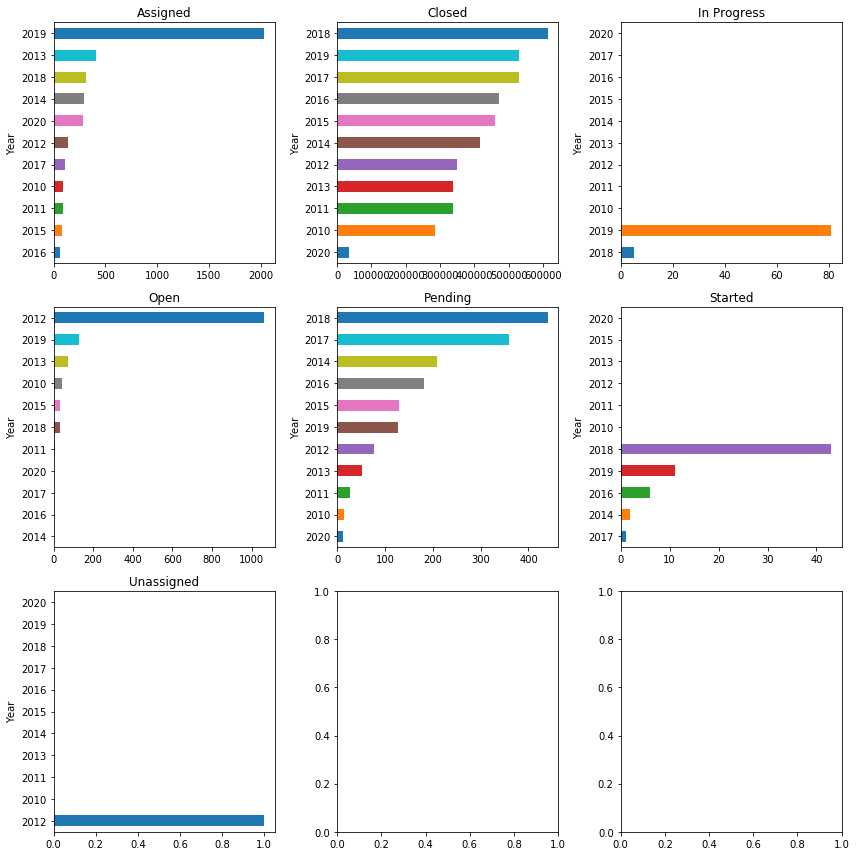

In [101]:
borough_comp = df.groupby(['Year','Status']).size().unstack()

col_number = 3
row_number = 3
fig, axes = plt.subplots(row_number,col_number, figsize=(12,12))

for i, (label,col) in enumerate(borough_comp.iteritems()):
    ax = axes[int(i/col_number), i%col_number]
    col = col.sort_values(ascending=True)[:15]
    col.plot(kind='barh', ax=ax)
    ax.set_title(label)
    
plt.tight_layout()

In [102]:
df.shape

(4372213, 34)

In [103]:
df = df[df['Location Type'] != 'nan']

###########################################################################################################################
#################################################################################################################################################

## MULTI CLASS CLASSIFICATION  

----> Example : A fruit is ORANGE ,APPLE OR PEAR but not both or all three

1. As it is a classification task with more than 2 classes and "IMBALANCED DATASET" 
2. (Classification classess are not of same quanitiy)
3. I want to use LOGISTIC REGRESSION / KERAS/ CSR MATRIX CROSS VALIDATION
 

In [104]:
df_model = df[["Agency","Descriptor","Complaint Type","Location Type","City","Status","Resolution Description","Latitude","Longitude","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]

In [105]:
df_model.dropna(how='any')

,Agency,Descriptor,Complaint Type,Location Type,City,Status,Resolution Description,Latitude,Longitude,Total_Time,Resolution_Time,Year,Month,DayofWeek
9,DSNY,dead anim,SanitationComplaints,sidewalk,Jamaica,Closed,department sanitation investigated complaint found condition loc,40.714444,-73.776398,1.0,1.0,2014,4,0
22,DSNY,derelict vehicl,StreetComplaints,street,Ridgewood,Closed,department sanitation removed item,40.697486,-73.900898,0.0,0.0,2014,4,0
23,DOHMH,animal wast,SanitationComplaints,12 family dwelling,Ozone Park,Closed,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu,40.681390,-73.837650,4.0,4.0,2014,4,0
24,DOHMH,animal odor,SanitationComplaints,12 family dwelling,College Point,Closed,department health mental hygiene review complaint determine appropriate action complaints type usually result inspection please call days date complaint statu,40.778271,-73.842491,9.0,9.0,2014,4,0
26,HPD,heavy flow,WaterComplaints,RESIDENTIAL,Jamaica,Closed,department housing preservation development inspected following conditions violations issued complaint clos,40.714815,-73.774853,15.0,15.0,2014,4,0
27,DSNY,e illegal post,SanitationComplaints,sidewalk,Flushing,Closed,department sanitation removed illegal postings location department issue notice violation responsible party identifi,40.770716,-73.833721,1.0,1.0,2014,4,0
28,DSNY,e receptacle viol,SanitationComplaints,sidewalk,Bellerose,Closed,department sanitation investigated complaint found condition loc,40.739844,-73.722992,1.0,1.0,2014,4,0
29,DSNY,e illegal post,SanitationComplaints,sidewalk,Rego Park,Closed,department sanitation removed illegal postings location department issue notice violation responsible party identifi,40.731341,-73.869219,1.0,1.0,2014,4,0
30,DSNY,e throwout,SanitationComplaints,sidewalk,Rosedale,Closed,department sanitation investigated complaint found violation loc,40.654920,-73.726386,2.0,2.0,2014,4,0
31,DSNY,e dirty sidewalk,SanitationComplaints,sidewalk,Springfield Gardens,Closed,department sanitation investigated complaint found violation loc,40.662400,-73.746991,8.0,8.0,2014,4,0


In [106]:
df_model.shape

(3229971, 14)

In [107]:
df_model_label = df_model.copy()

In [108]:
label_encoder = LabelEncoder()
df_model_label['Agency']=label_encoder.fit_transform(df_model['Agency'])
df_model_label['Descriptor']=label_encoder.fit_transform(df_model['Descriptor'])
df_model_label['City']=label_encoder.fit_transform(df_model['City'])
df_model_label['Status']=label_encoder.fit_transform(df_model['Status'])
df_model_label['Resolution Description']=label_encoder.fit_transform(df_model['Resolution Description'])
df_model_label['Complaint Type']=label_encoder.fit_transform(df_model['Complaint Type'])
df_model_label['Location Type']=label_encoder.fit_transform(df_model['Location Type'])

In [109]:
df_model_label.head()

,Agency,Descriptor,Complaint Type,Location Type,City,Status,Resolution Description,Latitude,Longitude,Total_Time,Resolution_Time,Year,Month,DayofWeek
9,11,4,10,85,24,1,351,40.714444,-73.776398,1.0,1.0,2014,4,0
22,11,5,12,93,42,1,379,40.697486,-73.900898,0.0,0.0,2014,4,0
23,7,33,10,0,37,1,219,40.681390,-73.837650,4.0,4.0,2014,4,0
24,7,32,10,0,9,1,219,40.778271,-73.842491,9.0,9.0,2014,4,0
26,13,295,15,8,24,1,269,40.714815,-73.774853,15.0,15.0,2014,4,0


## Feature Engineering

### Correlation

1. Correlation is from 0 to 1 where 0 indicates least correlation and 1 indicates highest

,Agency,Descriptor,Complaint Type,Location Type,City,Status,Resolution Description,Latitude,Longitude,Total_Time,Resolution_Time,Year,Month,DayofWeek
Agency,1.000000,-0.106827,-0.357666,-0.162150,-0.001460,-0.006781,0.532070,-0.015263,-0.100744,-0.140416,-0.171291,0.113782,-0.000249,0.141287
Descriptor,-0.106827,1.000000,0.124250,-0.216401,-0.001312,-0.011189,-0.050997,-0.028963,0.029836,0.070726,0.086044,-0.014229,0.001789,-0.006107
Complaint Type,-0.357666,0.124250,1.000000,0.339970,0.041433,0.016955,-0.058604,-0.002524,0.081170,0.059699,0.073374,0.084868,0.008665,-0.066641
Location Type,-0.162150,-0.216401,0.339970,1.000000,0.043514,-0.001356,0.253229,0.062700,0.043882,0.016257,0.019611,0.049185,-0.001402,-0.070020
City,-0.001460,-0.001312,0.041433,0.043514,1.000000,0.001426,0.025682,-0.304858,0.037458,-0.006459,-0.007648,0.015141,0.003133,0.006460
Status,-0.006781,-0.011189,0.016955,-0.001356,0.001426,1.000000,-0.014665,-0.006254,-0.000657,-0.001169,-0.004699,-0.002446,0.002091,-0.000103
Resolution Description,0.532070,-0.050997,-0.058604,0.253229,0.025682,-0.014665,1.000000,0.032668,-0.071206,-0.151769,-0.185543,0.147542,0.006736,0.144615
Latitude,-0.015263,-0.028963,-0.002524,0.062700,-0.304858,-0.006254,0.032668,1.000000,-0.377571,0.000456,0.000859,-0.007595,-0.004697,-0.000284
Longitude,-0.100744,0.029836,0.081170,0.043882,0.037458,-0.000657,-0.071206,-0.377571,1.000000,0.023640,0.028802,-0.029047,0.007304,-0.022579
Total_Time,-0.140416,0.070726,0.059699,0.016257,-0.006459,-0.001169,-0.151769,0.000456,0.023640,1.000000,0.817743,-0.062081,0.010994,-0.035853


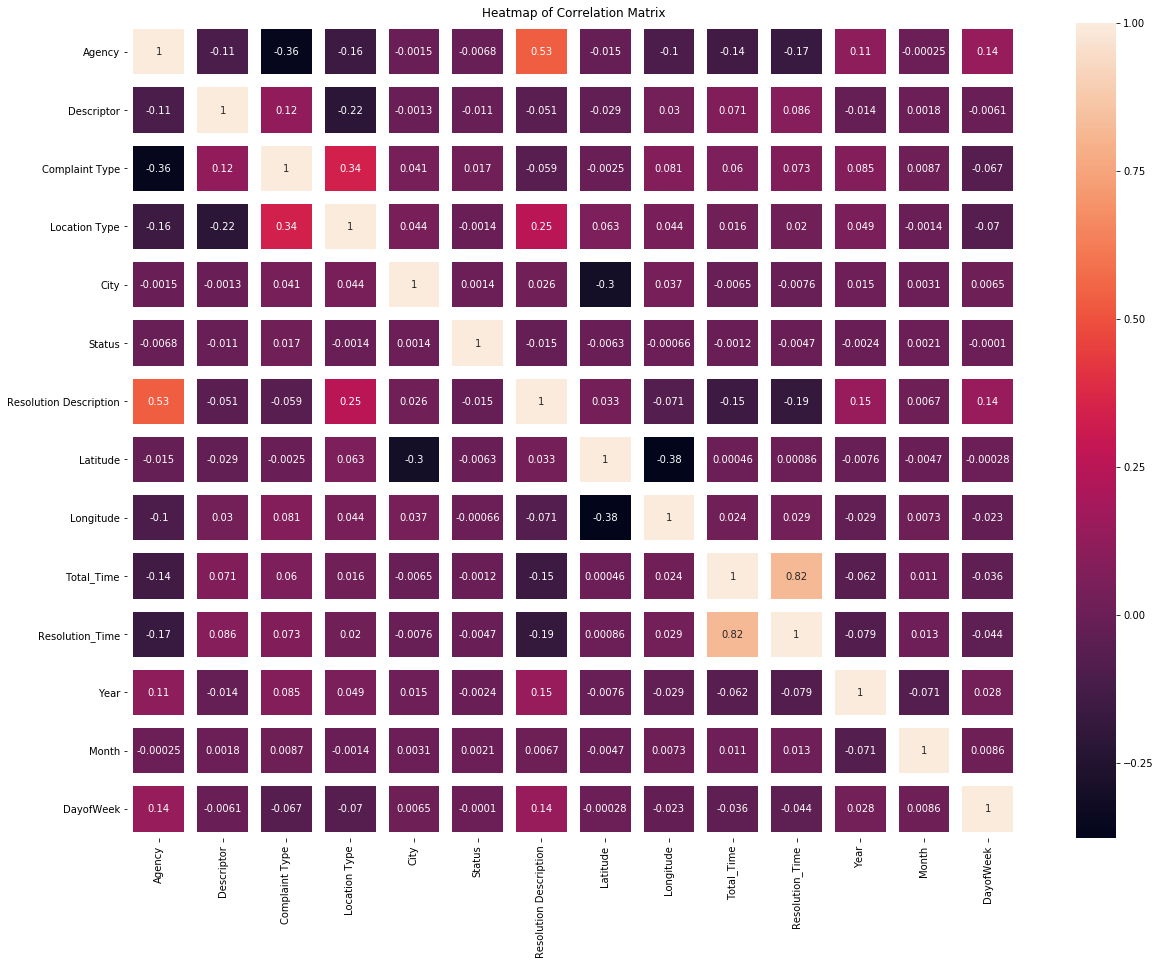

In [110]:
corr = df_model_label.corr()
fig, ax = plt.subplots(figsize=(20,15))    
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            linewidths=12, 
            ax=ax,
            annot=True, 
            annot_kws={"size": 10})
plt.title('Heatmap of Correlation Matrix')
corr

1. Complaint Type is correlated to Location Type
2. Resolution Description and Agency are correlated

In [111]:
X = df_model_label[["Agency","Descriptor","Location Type","City","Status","Resolution Description","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]
y = df_model_label["Complaint Type"]

X = df_model[["Agency","Descriptor","Location","City","Status","Resolution Description","Latitude","Longitude","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]
y = df_model["Complaint Type"]

train_img, test_img, train_lbl, test_lbl = train_test_split(X, y, test_size=1/7.0, random_state=122)

### Feature Importance and Selection

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

clf=RandomForestClassifier(n_estimators=100)

clf.fit(X_train,y_train)
feature_imp = pd.Series(clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Descriptor                0.359925
Location Type             0.208792
Resolution Description    0.153883
Agency                    0.143466
Resolution_Time           0.036085
Total_Time                0.035586
Year                      0.027159
City                      0.013378
Month                     0.012513
DayofWeek                 0.009062
Status                    0.000151
dtype: float64

No handles with labels found to put in legend.


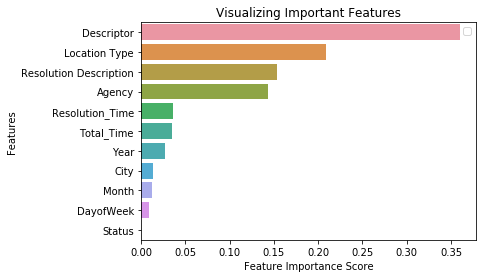

In [113]:
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

### Baseline Model : Logistic Regression

In [114]:
train_img, test_img, train_lbl, test_lbl = train_test_split(X, y, test_size=1/7.0, random_state=122)
scaler = StandardScaler()
# Fit on training set only.
scaler.fit(train_img)
# Apply transform to both the training set and the test set.
train_img = scaler.transform(train_img)
test_img = scaler.transform(test_img)

In [115]:
model = LogisticRegression(solver = 'lbfgs')
model.fit(train_img, train_lbl)

C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [116]:
import sklearn.metrics as metrics
# use the model to make predictions with the test data
y_pred = model.predict(test_img)
# how did our model perform?
count_misclassified = (test_lbl != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))
accuracy = metrics.accuracy_score(test_lbl, y_pred)
print('Accuracy: {:.2f}'.format(accuracy))

Misclassified samples: 163990
Accuracy: 0.64


####### the above gives the misclassifed samples 
##### Evaluate the model thru Confusion Matrix but here its multi class so hard to understand but lets calculate precision and accuracy

In [117]:
cnf_matrix = metrics.confusion_matrix(test_lbl, y_pred)
cnf_matrix

array([[  277,  1075,     0,  1809,     0,     0,     0,   141,    66,
            0,  1777,     0,    43,     0,     0,     0,     0,     0,
            0,     0,    22,     0,     2,   157,     0],
       [  488,  5969,     8,  4438,     3,   269,    13,   142,   457,
            0,  1829,     0,  3471,     0,     0,     0,   139,     0,
            4,     0,   119,     0,  1489,   129,     0],
       [    0,     1,   263,     0,     0,     0,     0,     0,     0,
            0,     2,     0,    29,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,   156,     0],
       [    1,   310,     0, 29573,     0,     0,  2915,  1250,    10,
            0,   118,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     3,     0,     0,     0,     5],
       [    0,   851,     0,     0,     3,    10,     0,   718,     0,
            0,    14,     0,    21,     0,     0,     0,     0,     0,
            0,     0,     0,     2,     0,     0,     0],


We have to take accuracy into consideration as it is very less for our baseline model lets try with random forest classifer as tree based modelsa are robust and works well for classification

In [118]:
np.diag(cnf_matrix)

array([  277,  5969,   263, 29573,     3,   214, 59907,  1401,   190,
       92534,  9962,     0, 73804,  1075,     0,     0,     0,     0,
           0,   632,    75,   229,   884, 15746,  4697], dtype=int64)

In [119]:
np.sum(cnf_matrix, axis = 0)

array([  2541,  21487,    395,  47801,     17,    751,  67684,   6937,
         1728, 125931,  27039,      0, 121728,   1547,      0,    239,
          151,      0,      9,    962,    308,    400,   3051,  22061,
         8658], dtype=int64)

In [120]:
recall = np.mean(np.diag(cnf_matrix) / np.sum(cnf_matrix, axis = 1))

In [121]:
(np.diag(cnf_matrix) / np.sum(cnf_matrix, axis = 0))

C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([0.1090122 , 0.27779588, 0.66582278, 0.61866907, 0.17647059,
       0.2849534 , 0.8850984 , 0.2019605 , 0.1099537 , 0.73479922,
       0.36843079,        nan, 0.60630258, 0.69489334,        nan,
       0.        , 0.        ,        nan, 0.        , 0.65696466,
       0.24350649, 0.5725    , 0.28974107, 0.71374824, 0.54250404])

In [122]:
precision = np.mean(np.diag(cnf_matrix) / np.sum(cnf_matrix, axis = 0))

C:\Users\pavani.nrusimhdevara\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [123]:
print("precision",precision)
print("recall",recall)

precision nan
recall 0.313809652232251


Accuracy is the main metric for multi class classification as precision and recall scores doesnt play an important role as we are taking aaverage of individual classes (Each complaint Type)

### Random Forests Classification

My favourite is tree based models as they work faster and works well with classification 
Its used to identify feature importance too

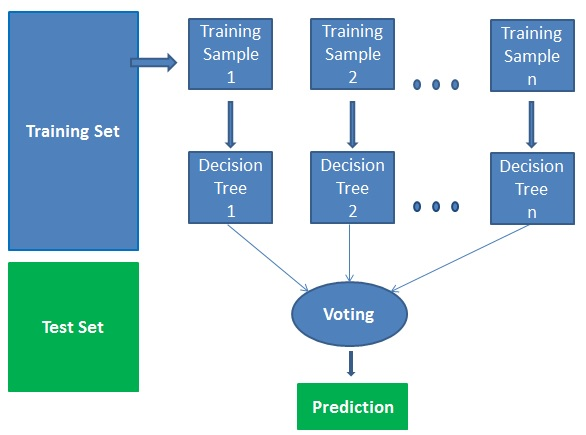

In [124]:
from IPython.display import Image
Image(filename='rf.png')

In [125]:
X = df_model_label[["Agency","Descriptor","Location Type","City","Status","Resolution Description","Total_Time","Resolution_Time","Year","Month","DayofWeek"]]
y = df_model_label["Complaint Type"]

In [126]:
clf=RandomForestClassifier(n_estimators=100)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

#Train the model using the training sets y_pred=clf.predict(X_test)
clf.fit(X_train,y_train)

y_pred=clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9947605346586968


In [127]:
count_misclassified = (y_test != y_pred).sum()
print('Misclassified samples: {}'.format(count_misclassified))

Misclassified samples: 5077


#### Checking if my model is overfitting --- 10 Fold CV

In [128]:
scores = cross_val_score(clf, X, y, cv=10, scoring='accuracy')
print(scores)

[0.94199964 0.95760023 0.96878299 0.9757521  0.97260965 0.94546079
 0.93520064 0.95984792 0.96503992 0.96035257]


My number of missclassifed samples are extremely less and thats why accuracy score went up which is good

Ideas!!

How  about holidays and Season? Does these complaints go up or what kind of complaints can be expected


## Season

In [129]:
conditions =[
    (df['Month']==1 )| (df['Month']==12)| (df['Month']==2),
    (df['Month']==3) | (df['Month']==4) | ( df['Month']==5),
    (df['Month']==6) | (df['Month']==7) | (df['Month']==8),
    (df['Month']==9)|(df['Month']==10)| (df['Month']==11),
   ]
choices = ['Winter', 'Spring', 'Summer','Fall']
df['Season']= np.select(conditions, choices, default="black")

##### TF IDF

#df_model_loctype = df[["Agency","Location","Location Type","City","Incident Zip","Latitude","Longitude"]]
# CountVectorizer - Simply, counts word frequencies 
# TFIDF - More importance/weights on "rare" words. Less importance/weights on "frequent" words
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
# LabelBinarizer - Converts labels into numerical representation "G,B,R" -> [1,2,3]
from sklearn.preprocessing import LabelBinarizer
from scipy.sparse import vstack, hstack, csr_matrix

## APPLYING COUNT VECTORIZATION THAT CONVERTS IT INTO A SPARSE AMTRIX

cv = CountVectorizer(min_df=10)
X_ResDes = cv.fit_transform(df['Resolution Description'])
X_ResDes

##############################################################################################

cv = CountVectorizer()
X_LocType = cv.fit_transform(df['Location Type'])
X_LocType
#################################################################################################

## TF IDF Vectorization ----> More importance is given to rare words
## Count Vectorizor --> Gives the frequencies of Words
## Label Binarizer --> Coverts G,B,R --> 1,2,3

################################################################################################

cv = CountVectorizer()
X_Des = cv.fit_transform(df['Descriptor'])
#X_sub1 = cv.fit_transform(combined['sub_category_1'])
#X_sub2 = cv.fit_transform(combined['sub_category_2'])
X_Des

###############################################################################################

# Apply TFIDF to "resolution_description", 
tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_description = tv.fit_transform(df['Resolution Description'])

tv = TfidfVectorizer(max_features=55000, ngram_range=(1, 2), stop_words='english')
X_descriptor = tv.fit_transform(df['Descriptor'])

# Apply LabelBinarizer to "Location Type"
lb = LabelBinarizer(sparse_output=True)
X_Loc = lb.fit_transform(df['Location Type'])

# Apply LabelBinarizer to "Location Type"
lb = LabelBinarizer(sparse_output=True)
X_Com = lb.fit_transform(df['Complaint Type'])

#####################################################################################################

####### Creating CSR Matrix

####### Merging the Sparse Matrices

# Create our final sparse matrix
X_dummies = csr_matrix(pd.get_dummies(df[['Agency','City', 'Status','Latitude',
                                                'Longitude','Total_Time','Resolution_Time',
                                                'Year','Month','DayofWeek']], sparse=True).values)

# Combine everything together
sparse_merge = hstack((X_dummies, X_description, X_descriptor, X_Loc,X_Com)).tocsr()

####################################################################################################

X_train = sparse_merge[:len(df)]

y = sparse_merge[len(df):]

from sklearn.model_selection import KFold
eval_size = .10
kf = KFold(10,shuffle=False)
i = 0
for train_indicies, valid_indicies in kf.split(X_train,y):
    print("TRAIN:", train_indices, "TEST:", test_indices)
    X_train, y_train = X_train[train_indicies], y[train_indicies]
    X_valid, y_valid = X_train[valid_indicies], y[valid_indicies]
    i = i+1